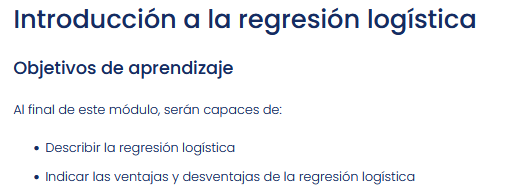

#Regresion logistica

Puede ser muy confuso al principio, pero los modelos de regresion logistica se usan para los problemas de clasificacion.

**Antecedentes - Delimitacion de salida**

Antes de explicar la regresion logistica, hay que entender como delimitar una salida entre 0 y 1 utilizando una funcion sigmoide.

Primero mostremos una relacion linear donde una salida continua (y) se modela como una combinacion linear de caracteristicas.

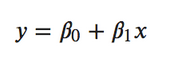



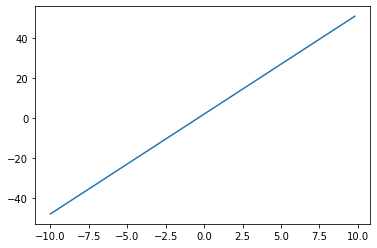

In [1]:
import numpy as np
import matplotlib.pyplot as plt
# B0 is 2 in this case
# B1 is 5 in this case
# I put in numbers to show where they go
x = np.arange(-10., 10., 0.2)
y = 2 + 5* x
plt.plot(x, y)



La regresion logistica utiliza algo llamado una funcion sigmoide, el cual delimita la salida entre 0 y 1. Cuando el objetivo de lo que quieren predecir es binario, esto hara que la regresion logistica produzca las probabilidades de uan clase especifica. Las probabilidades se pueden convertir en predicciones de clase.

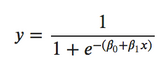

Asi es como se convierte un algoritmo de regresion como una regresion linear para tener un algoritmo de clasificacion como una regresion logistica.

La regresion logistica es un algoritmo que se usa para los problemas de clasificacion.

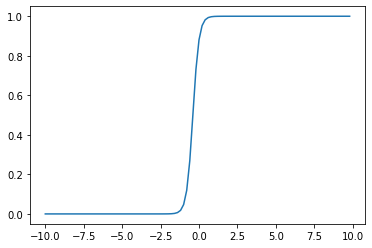

In [2]:
# B0 is 2 in this case
# B1 is 5 in this case
# I put in numbers to show where they go
def sigmoid(x):    
  s = 1 / (1 + np.exp(-(2 + 5*x)))
  return s    
plt.plot(x, sigmoid(x))



In [2]:
from google.colab import drive
drive.mount ("/content/drive")

Mounted at /content/drive


In [3]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression



In [4]:
df = pd.read_csv("/content/drive/MyDrive/Data CodingDojo/cancer.csv")
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


Conversion de objetivo a valores numericos

In [5]:
df["diagnosis"] = df["diagnosis"].replace({"B":0,"M":1})

Visualizar la relacion entre concave points_worst y diagnosis (objetivo)

Text(0.5, 0, 'concave points_worst')

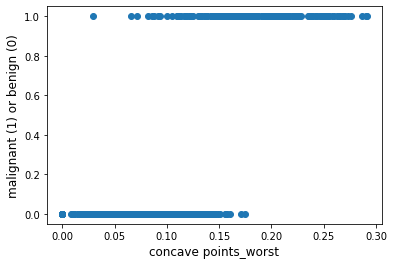

In [6]:
plt.scatter(df['concave points_worst'], df['diagnosis'])
plt.ylabel('malignant (1) or benign (0)', fontsize = 12)
plt.xlabel('concave points_worst', fontsize = 12)

**Intento de regresion lineal para clasificar los datos**

La regresion lineal era buena cuando queriamos predecir un valor continuo.
Esta seccion solo muestra como intentar usar la regresion linear para clasificar si el problema es maligno (1 en el grafico anterior) o benigno( 0 en el grafico de abajo)

In [7]:
# Assign feature matrix and target vector
X = df[['concave points_worst']]
y = df['diagnosis']
# Train Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)



Text(0.5, 0, 'concave points_worst')

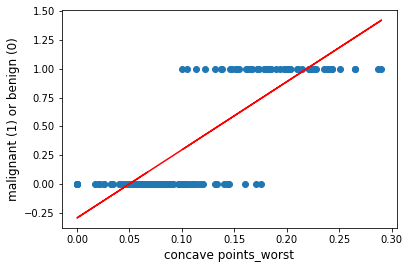

In [13]:
# Make a linear regression instance
lr = LinearRegression()
# Training the model on the data, storing the information learned from the data
# Model is learning the relationship between X and y 
lr.fit(X_train,y_train)
# Get Predictions
predictions = lr.predict(X_test)
# This code shows how to graph the results comparing the prediction with the actual value
plt.scatter(X_test['concave points_worst'], y_test)
plt.plot(X_test['concave points_worst'], predictions, color='red')
plt.ylabel('malignant (1) or benign (0)', fontsize = 12)
plt.xlabel('concave points_worst', fontsize = 12)

De acuerdo con esto, cualquier valor de prediccion (rojo) >= 0,5 (que corresponde al valor cerca de 0,15 para worst_concave_point), predecimos una clase 1 (maligno), sino predecimos una clase 0 (benigno).

Problema: si el valor para worse_concave_point is 0,0 . que significa cuando tenemos -0,25 para nuestra clase en lugar de 1 o 0? Parece extrano, quizas deberiamos restringir nuestras predicciones entre 0 y 1. Eso se puede hacer usando la regresion logistica.

In [14]:
# Make an instance of the model
logreg = LogisticRegression(C = 1000)
# Instantiate Scaler
scaler = StandardScaler()
# Create pipeline
logreg_pipe = make_pipeline(scaler, logreg)
# Training the model on the data, storing the information learned from the data
# Model is learning the relationship between X and y 
logreg_pipe.fit(X_train,y_train)


Pipeline(steps=[('standardscaler', StandardScaler()),
                ('logisticregression', LogisticRegression(C=1000))])

In [15]:
# This code is just to plot/visualize the predictions
example_df = pd.DataFrame(data = {'worst_concave_points': X_test['concave points_worst'],
                     'diagnosis': y_test})
example_df['logistic_preds'] = pd.DataFrame(logreg_pipe.predict_proba(X_test)).loc[:, 1].values
example_df = example_df.sort_values(['logistic_preds'])

Text(0.5, 0, 'concave points_worst')

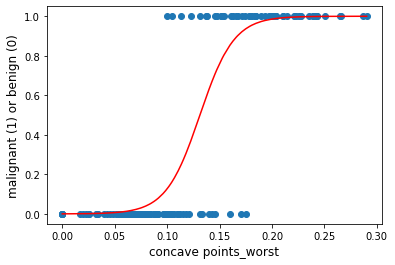

In [16]:
plt.scatter(X_test['concave points_worst'], y_test)
plt.plot(example_df['worst_concave_points'], example_df['logistic_preds'].values, color='red')
plt.ylabel('malignant (1) or benign (0)', fontsize = 12)
plt.xlabel('concave points_worst', fontsize = 12)



## Regresion logistica

Observen que podemos escalar los datos para usarlos en el modelo de regresion.

Las probabilidades previstas estan ahora mas calibradas por lo que ahora se puede predecir un 0 o un 1 dependiendo de los puntos worst_concave_points.

# Ventajas y desventajas del algoritmo

- Ventajas:

1. Capas de interpretar como el modelo hace predicciones.
2. El modelo de entrenamiento y prediccion son relativamente rapidos.
3. Puede funcionar bien con un numero reducido de observaciones.
4. Generalmente no se necesita de ajustes para la regresion logistica a menos se quiera regularizar el modelo.

- Desventajas

1. Requiere un escalado de caracteristicas.
2. El algoritmo de clasificacion binaria no funciona para problemas multiclase.